# Social Network Ads

Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users’ demographic information and target their ads appropriately. Advantages are advertisers can reach users who are interested in their products, allows for detailed analysis and reporting, information gathered is real, not from statistical projections, does not access IP-addresses of the users.

## Data
For this study, we collected data from trusted website.
Data contains 5 columns.

__UserID__ - Each person has a unique ID from which we can identify the person uniquely.

__Gender__ - Person can male or female. This field is very important for our hypothesis.

__Age__ - Age of the person. Because our product can be useful to some ages only.

__EstimatedSalary__ - This column contains salary of a person as salary can affect the shopping of a person.

__Purchased__ - Contains two numbers ‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.This variable is our dependent variable.

# Import libraries

In [1]:
import pandas as pd # for pandas
import seaborn as sns # Graph 
import matplotlib.pyplot as plt # Visualize data
%matplotlib inline 

import warnings # ignore warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.model_selection import train_test_split #training and testing data split

from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree

In [2]:
# Read data

Social_Network = pd.read_csv(".\Data\Social_Network_Ads.csv")
Social_Network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print(Social_Network.isnull().sum())
print(Social_Network.shape)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
(400, 5)


We have total 400 rows and 5 columns, Out of 5 columns UserId is not of any use, so we can drop that. Gender columns has two attribute Male & Female. Our Target Column is Purchased with values of 0 and 1. There is no missing value in our dataset.

In [4]:
# Remove User ID feature

Social_Network.drop('User ID',axis=1,inplace=True)

In [5]:
# Statistical Summary

Social_Network.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


From describe we get that Age is spread between 18 to 60, with an average of 37.65 and Std Dev of 10.48 & Estimated Salary between 15000 to 150,000, with an average of 69,742.5 and Std Dev of 34,096.96.

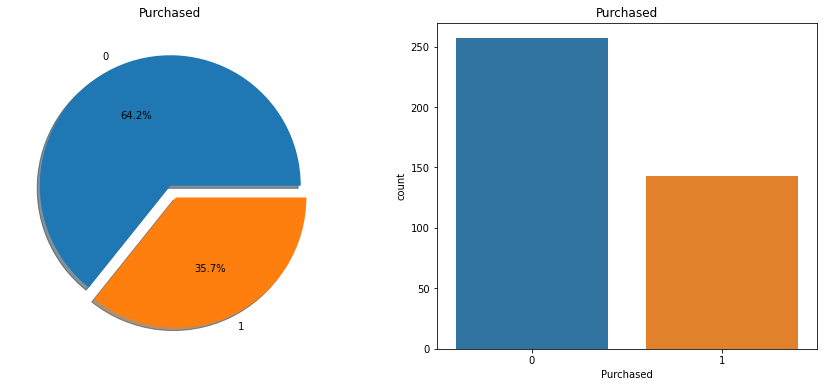

In [6]:
f,ax=plt.subplots(1,2,figsize=(15,6))
Social_Network['Purchased'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchased')
ax[0].set_ylabel('')
sns.countplot('Purchased',data=Social_Network,ax=ax[1])
ax[1].set_title('Purchased')
plt.show()

We see that None-purchased is more than purchased in our dataset

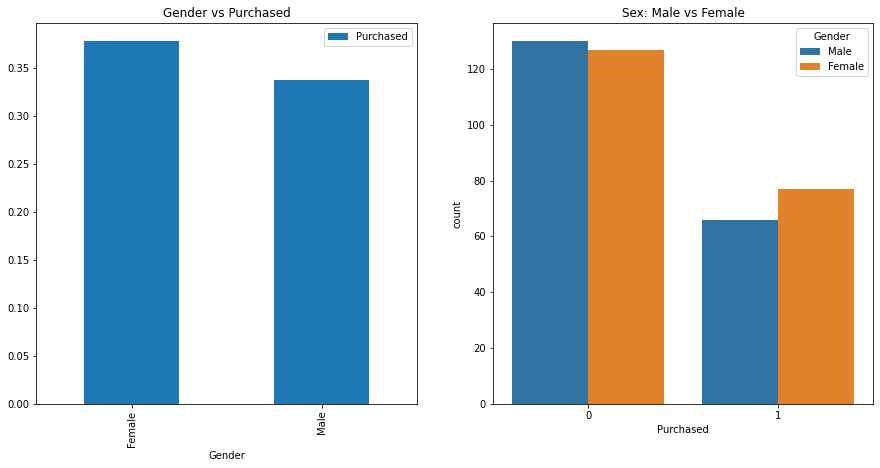

In [7]:
f,ax=plt.subplots(1,2,figsize=(15,7))
Social_Network[['Gender','Purchased']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Gender vs Purchased')
sns.countplot('Purchased',hue='Gender',data=Social_Network,ax=ax[1])
ax[1].set_title('Sex: Male vs Female')
plt.show()

Compare Purchased over gender, our dataset has no significant difference between female and male.

# Encoding categorical feature

Change text data to binary by cat codes.

In [8]:
Social_Network['Gender'] = Social_Network['Gender'].astype('category')
Social_Network['Gender'] = Social_Network['Gender'].cat.codes
Social_Network

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [9]:
# Count numbers of Gender

Social_Network.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

Gender features has 204 female and 196 male.

In [10]:
# Correlation between features for test
test_corr  = Social_Network.corr(method='pearson').abs()
test_corr.style.background_gradient(cmap='Pastel1').set_precision(2)

,Gender,Age,EstimatedSalary,Purchased
Gender,1.00,0.07,0.06,0.04
Age,0.07,1.00,0.16,0.62
EstimatedSalary,0.06,0.16,1.00,0.36
Purchased,0.04,0.62,0.36,1.00


From correlation table, we get that our matrix's features hasno highly variables. Most correlated are Purchased and Age

# Dataset Spliting

In [11]:
# Split Data by X and y

X = Social_Network.iloc[:,0:3].values
y = Social_Network.iloc[:,3].values

In [12]:
print(X.shape, y.shape)

(400, 3) (400,)


Shape of data: 400 row, X has 3 feature and y has one.

In [13]:
# Splitting Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0, shuffle=True)

In [14]:
# Training the model on the data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Modelling

In this project used **LogisticRegression** and **KNeighborsClassifier** by Grid Search CV  Hyperparametrs

### Linear Support Vector Machine (SVM)

In [15]:
SVM=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
SVM.fit(X_train,y_train)
pred1=SVM.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(pred1,y_test))

Accuracy for linear SVM is 0.9125


In [16]:
print (classification_report(y_test, pred1))
SVM_matrix = confusion_matrix(y_test, pred1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



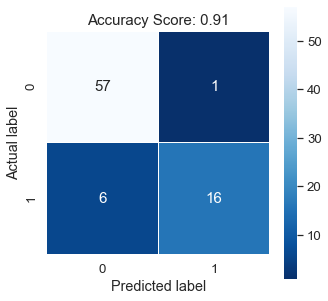

In [17]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(SVM_matrix, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(pred1,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### LogisticRegression

In [18]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

#Predict labels

pred2=LR.predict(X_test)
print('The accuracy of the Logistic Regression',metrics.accuracy_score(pred2,y_test))

The accuracy of the Logistic Regression 0.9125


In [19]:
print (classification_report(y_test, pred2))
LR_matrix = confusion_matrix(y_test, pred2)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



##### Confusion Matrix 

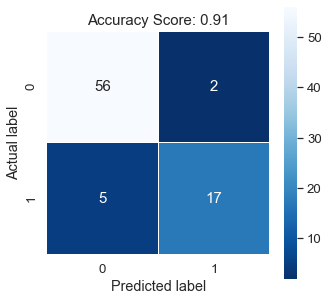

In [20]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(LR_matrix, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(pred2,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### K-Nearest Neighbours(KNN)

In [21]:
KNN=KNeighborsClassifier() 
KNN.fit(X_train, y_train)
pred3=KNN.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(pred3,y_test))

The accuracy of the KNN is 0.95


In [22]:
#Confusion matrix
print (classification_report(y_test, pred3))
KNN_matrix = confusion_matrix(y_test, pred3)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



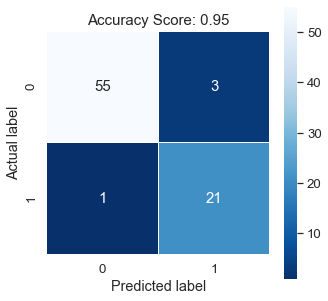

In [23]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(KNN_matrix, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
# labels, title and ticks
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(pred3,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### Decision Tree

In [24]:
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred4=DT.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(pred4,y_test))

The accuracy of the Decision Tree is 0.9125


In [25]:
#Confusion matrix
print (classification_report(y_test, pred4))
DT_matrix = confusion_matrix(y_test, pred4)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.80      0.91      0.85        22

    accuracy                           0.91        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.92      0.91      0.91        80



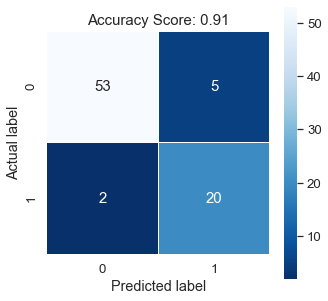

In [26]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(DT_matrix, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
# labels, title and ticks
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(pred4,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### Random Forests

In [27]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
pred5=RF.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(pred5,y_test))

The accuracy of the Random Forests is 0.925


In [28]:
#Confusion matrix
print (classification_report(y_test, pred5))
RF_matrix = confusion_matrix(y_test, pred5)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



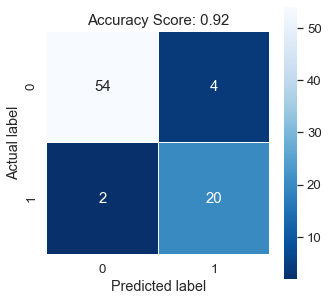

In [29]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(RF_matrix, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
# labels, title and ticks
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(pred5,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

In [30]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
Accuracy=[]
std=[]
classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    #cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    i.fit(X_train, y_train)
    pred=i.predict(X_test)
    acc = metrics.accuracy_score(pred,y_test)
    #cv_result=cv_result
    xyz.append(acc.mean())
    std.append(acc.std())
    Accuracy.append(acc)
Compare_models=pd.DataFrame({'Accuracy':xyz},index=classifiers)       
Compare_models

,Accuracy
Radial Svm,0.9500
Logistic Regression,0.9125
KNN,0.9500
Decision Tree,0.9000
Random Forest,0.9375


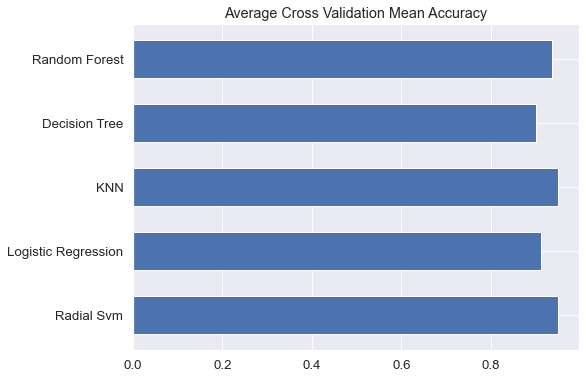

In [31]:
Compare_models['Accuracy'].plot.barh(width=0.6)
plt.title('Average Cross Validation Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

# Conclusion

Over the graphs, we can see that KNN and SVM are most suitable for predection. That is why both of method is make high accuracy.